In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import fuzzywuzzy
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_columns', None)

In [2]:
from fuzzywuzzy import fuzz

def match_name(name, list_names, min_score=0):
    # -1 score incase we don't get any matches
    max_score = -1
    # Returning empty name for no match as well
    max_name = ""
    # Iternating over all names in the other
    for name2 in list_names:
        #Finding fuzzy match score
        score = fuzz.ratio(name, name2)
        # Checking if we are above our threshold and have a better score
        if (score > min_score) & (score > max_score):
            max_name = name2
            max_score = score
    return (max_name, max_score)

In [3]:
df_fpl = pd.read_csv(r'C:\Users\aaron\prem_league_analytics\data\fantasy_prem.csv')

In [4]:
#pandas_profiling.ProfileReport(df_fpl)

In [10]:
df_fifa = pd.read_csv(r'C:\Users\aaron\prem_league_analytics\data\cleaning\fifa.csv')
df_fifa = df_fifa.drop(columns=['Unnamed: 0'])
df_perf = pd.read_csv(r'C:\Users\aaron\prem_league_analytics\data\cleaning\perf.csv')
df_perf = df_perf.drop(columns=['Unnamed: 0'])
df_trans = pd.read_csv(r'C:\Users\aaron\prem_league_analytics\data\cleaning\trans.csv')
df_trans = df_trans.drop(columns=['Unnamed: 0'])

In [11]:
df_trans['current club'].value_counts()

Brighton & Hove Albion     38
Everton FC                 36
Sheffield United           33
Norwich City               32
Watford FC                 30
Liverpool FC               30
Newcastle United           29
West Ham United            27
Wolverhampton Wanderers    27
Aston Villa                27
Manchester City            27
Leicester City             25
AFC Bournemouth            24
Arsenal FC                 24
Chelsea FC                 23
Manchester United          21
Southampton FC             21
Burnley FC                 19
Tottenham Hotspur          16
Crystal Palace             16
Name: current club, dtype: int64

In [12]:
df_perf['current club'].value_counts()

Watford FC                 122
Leicester City             117
Newcastle United           117
AFC Bournemouth            115
Sheffield United           114
Brighton & Hove Albion     111
Tottenham Hotspur          105
Norwich City               104
Wolverhampton Wanderers    101
Manchester United          100
West Ham United            100
Everton FC                  99
Crystal Palace              99
Burnley FC                  98
Southampton FC              96
Arsenal FC                  96
Liverpool FC                92
Aston Villa                 90
Chelsea FC                  89
Manchester City             87
Name: current club, dtype: int64

In [13]:
df_trans['position'].value_counts()

Defender - Centre-Back             84
Midfielder - Central Midfield      81
Forward - Centre-Forward           72
Goalkeeper                         67
Defender - Right-Back              51
Midfielder - Defensive Midfield    40
Forward - Left Winger              38
Defender - Left-Back               34
Forward - Right Winger             31
Midfielder - Attacking Midfield    23
Midfielder - Right Midfield         2
Midfielder - Left Midfield          2
Name: position, dtype: int64

In [14]:
df_trans_gk = df_trans[df_trans['position'] == 'Goalkeeper']

In [15]:
df_trans_gk

,name,age,height,position,current club,date,left,joined,mv,year,short_name
0,Ederson,26,188.0,Goalkeeper,Manchester City,"Jul 1, 2015",Rio Ave FC,Benfica,1000000.0,15/16,NaN
1,Scott Carson,34,188.0,Goalkeeper,Manchester City,"Jul 1, 2015",Wigan,Derby,2000000.0,15/16,S. Carson
7,Caoimhin Kelleher,20,188.0,Goalkeeper,Liverpool FC,NaN,NaN,NaN,0.0,15/16,C. Kelleher
8,Andy Lonergan,35,193.0,Goalkeeper,Liverpool FC,"Jul 1, 2015",Bolton,Fulham,500000.0,15/16,A. Lonergan
22,Sergio Romero,32,192.0,Goalkeeper,Manchester United,"Jul 27, 2015",Sampdoria,Man Utd,5000000.0,15/16,S. Romero
50,Artur Boruc,39,193.0,Goalkeeper,AFC Bournemouth,"Jul 1, 2015",Southampton,Bournemouth,1000000.0,15/16,A. Boruc
51,Mark Travers,20,191.0,Goalkeeper,AFC Bournemouth,NaN,NaN,NaN,0.0,15/16,M. Travers
54,Harry Burgoyne,22,193.0,Goalkeeper,Wolverhampton Wanderers,NaN,NaN,NaN,0.0,15/16,H. Burgoyne
65,Alex McCarthy,29,193.0,Goalkeeper,Southampton FC,"Jul 23, 2015",QPR,Crystal Palace,2000000.0,15/16,A. McCarthy
82,Mathew Ryan,27,184.0,Goalkeeper,Brighton & Hove Albion,"Jul 21, 2015",Club Brugge,Valencia,7000000.0,15/16,M. Ryan


In [16]:
df_perf['position'].value_counts()

Defender - Centre-Back             453
Midfielder - Central Midfield      325
Forward - Centre-Forward           264
Defender - Right-Back              219
Defender - Left-Back               176
Midfielder - Defensive Midfield    168
Forward - Right Winger             153
Forward - Left Winger              125
Midfielder - Attacking Midfield    121
Midfielder - Left Midfield          28
Midfielder - Right Midfield         15
Forward - Second Striker             5
Name: position, dtype: int64

In [17]:
df_fifa['player_positions'].value_counts()

CB                881
ST                766
GK                742
CM                333
CM, CDM           301
                 ... 
LB, CB, CDM         1
LB, LWB, CB         1
RM, CM, LM, RB      1
RB, LM              1
LM, ST, CAM         1
Name: player_positions, Length: 441, dtype: int64

In [18]:
df_fifa_gk = df_fifa[df_fifa['player_positions'] == 'GK']

In [19]:
df_fifa_gk

,short_name,overall,club,value_eur,wage_eur,player_positions,year,potential,player_positions.1,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
4,Alisson,89,Liverpool,58000000,155000,GK,19/20,91,GK,Right,3,3,1,GK,1.0,2018-07-19,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,84.0,85.0,89.0,51.0,90.0,"Flair, Swerve Pass",17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,85,84,85,90,89
5,De Gea,89,Manchester United,56000000,205000,GK,19/20,90,GK,Right,4,3,1,GK,1.0,2011-07-01,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,84.0,81.0,92.0,58.0,85.0,"Flair, Second Wind, Flair Passes",17,13,21,50,13,18,21,19,47,38,57,58,63,87,43,61,67,43,60,12,38,30,12,65,29,68,25,21,13,90,84,81,85,92
9,Ederson,88,Manchester City,54500000,185000,GK,19/20,91,GK,Left,2,3,1,GK,31.0,2017-07-01,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,86.0,82.0,93.0,88.0,63.0,86.0,"Leadership, Swerve Pass, Acrobatic Clearance",20,14,14,56,18,23,15,20,58,40,64,63,60,87,48,70,66,41,68,18,38,27,20,70,17,70,29,15,8,86,82,93,86,88
12,H. Lloris,88,Tottenham Hotspur,36000000,150000,GK,19/20,88,GK,Left,4,1,1,GK,1.0,2012-08-31,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0,82.0,68.0,91.0,63.0,84.0,"Swerve Pass, Acrobatic Clearance",13,10,10,50,11,10,11,10,50,34,65,62,55,86,54,51,74,41,43,14,31,27,10,30,40,65,29,10,18,89,82,68,84,91
28,Kepa,84,Chelsea,31000000,92000,GK,19/20,89,GK,Right,1,4,1,GK,1.0,2018-08-08,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,84.0,82.0,86.0,85.0,33.0,80.0,"Flair, Flair Passes",25,11,18,51,18,10,25,19,53,16,34,33,41,78,39,65,71,37,51,14,18,21,15,57,24,63,19,18,16,84,82,86,80,85
31,B. Leno,84,Arsenal,26000000,91000,GK,19/20,86,GK,Right,3,3,1,GK,1.0,2018-07-01,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,83.0,81.0,78.0,85.0,56.0,84.0,Swerve Pass,9,9,13,45,10,16,9,8,42,30,55,56,52,79,44,59,73,43,68,14,28,22,7,54,23,66,27,15,18,83,81,78,84,85
48,J. Pickford,83,Everton,24000000,78000,GK,19/20,86,GK,Left,1,4,1,GK,1.0,2017-06-15,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,82.0,78.0,87.0,86.0,48.0,82.0,"Leadership, Swerve Pass, Flair Passes",17,19,15,55,20,14,18,16,56,40,53,44,55,84,55,65,77,45,70,13,42,24,18,68,45,68,21,20,12,82,78,87,82,86
52,K. Schmeichel,83,Leicester City,15500000,82000,GK,19/20,83,GK,Right,2,3,1,GK,1.0,2011-06-01,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,82.0,77.0,79.0,88.0,58.0,79.0,Avoids Using Weaker Foot,18,12,16,44,15,12,13,15,46,40,56,60,62,81,47,59,60,34,64,14,35,20,13,59,26,67,14,14,13,82,77,79,79,88
53,Rui Patrício,83,Wolverhampton Wanderers,16500000,82000,GK,19/20,83,GK,Left,3,2,1,GK,11.0,2018-06-18,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,84.0,80.0,77.0,82.0,55.0,81.0,"Diver, Second Wind",12,12,11,31,17,20,10,16,30,23,53,57,61,77,54,58,79,45,77,11,39,22,13,64,32,66,14,13,11,84,80,77,81,82
105,M. Ryan,80,Brighton & Hove Albion,12500000,43000,GK,19/20,82,GK,Right,1,4,1,GK,1.0,2017-07-01,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,81.0,75.0,82.0,83.0,52.0,78.0,"Flair, Swerve Pass",23,11,14,40,15,13,23,12,45,24,53,52,53,73,50,62,78,34,68,18,36,23,10,68,25,64,10,20,17,81,75,82,78,83


In [20]:
df_fifa

,short_name,overall,club,value_eur,wage_eur,player_positions,year,potential,player_positions.1,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,K. De Bruyne,91,Manchester City,90000000,370000,"CAM, CM",19/20,91,"CAM, CM",Right,4,5,4,RCM,17.0,2015-08-30,2023.0,76.0,86.0,92.0,86.0,61.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Avoids Using Weaker Foot, Div...",93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13
1,V. van Dijk,90,Liverpool,78000000,200000,CB,19/20,91,CB,Right,3,3,2,LCB,4.0,2018-01-01,2023.0,77.0,60.0,70.0,71.0,90.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Avoids Using Weaker Foot, Leadership, L...",53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,13,10,13,11,11
2,M. Salah,90,Liverpool,80500000,240000,"RW, ST",19/20,90,"RW, ST",Left,3,3,4,RW,11.0,2017-07-01,2023.0,93.0,86.0,81.0,89.0,45.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",79,90,59,84,79,89,83,69,75,89,94,92,91,92,88,80,69,85,73,84,63,55,92,84,77,91,38,43,41,14,14,9,11,14
3,H. Kane,89,Tottenham Hotspur,83000000,220000,ST,19/20,91,ST,Right,3,4,3,ST,10.0,2010-07-01,2024.0,70.0,91.0,79.0,81.0,47.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Avoids Using Weaker Foot, Argues ...",75,94,86,81,85,80,78,68,83,84,68,72,71,91,73,90,79,87,84,86,78,35,93,81,90,91,56,36,38,8,10,11,14,11
4,Alisson,89,Liverpool,58000000,155000,GK,19/20,91,GK,Right,3,3,1,GK,1.0,2018-07-19,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,84.0,85.0,89.0,51.0,90.0,"Flair, Swerve Pass",17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,85,84,85,90,89
5,De Gea,89,Manchester United,56000000,205000,GK,19/20,90,GK,Right,4,3,1,GK,1.0,2011-07-01,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,84.0,81.0,92.0,58.0,85.0,"Flair, Second Wind, Flair Passes",17,13,21,50,13,18,21,19,47,38,57,58,63,87,43,61,67,43,60,12,38,30,12,65,29,68,25,21,13,90,84,81,85,92
6,N. Kanté,89,Chelsea,66000000,235000,"CDM, CM",19/20,90,"CDM, CM",Right,3,3,2,RCM,7.0,2016-07-16,2023.0,78.0,65.0,77.0,81.0,87.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,Diver,68,65,54,86,56,79,49,49,81,80,79,77,82,93,92,71,77,97,73,63,90,92,72,79,54,85,90,91,85,15,12,10,7,10
7,S. Agüero,89,Manchester City,60000000,300000,ST,19/20,89,ST,Right,4,4,4,ST,10.0,2011-07-28,2021.0,80.0,90.0,77.0,88.0,33.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,"Avoids Using Weaker Foot, Outside Foot Shot",70,93,78,83,85,88,83,73,64,89,82,78,84,92,91,89,81,79,74,84,65,24,93,83,83,90,30,29,24,13,15,6,11,14
8,P. Pogba,88,Manchester United,72500000,250000,"CM, CDM",19/20,91,"CM, CDM",Right,4,4,5,LDM,6.0,2016-08-09,2021.0,74.0,81.0,86.0,85.0,66.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,"Selfish, Leadership, Argues with Officials, Fi...",80,75,75,86,84,87,85,82,90,90,67,79,75,82,66,90,82,87,89,82,78,64,83,88,83,87,63,67,65,5,6,2,4,3
9,Ederson,88,Manchester City,54500000,185000,GK,19/20,91,GK,Left,2,3,1,GK,31.0,2017-07-01,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,86.0,82.0,93.0,88.0,63.0,86.0,"Leadership, Swerve Pass, Acrobatic Clearance",20,14,14,56,18,23,15,20,58,40,64,63,60,87,48,70,66,41,68,18,38,27,20,70,17,70,29,15,8,86,82,93,86,8

In [21]:
df_prem_field_players = pd.merge(df_trans, df_perf,  on=['name','year','current club', 'age', 'height', 'position', 'short_name'], how = 'right')
#df = df.drop_duplicates()
df_prem_field_players

,name,age,height,position,current club,date,left,joined,mv,year,short_name,games,goals,assists,minutes
0,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,"Aug 20, 2015",Valencia,Man City,25000000.0,15/16,N. Otamendi,49.0,1.0,0.0,4268.0
1,João Cancelo,25,182.0,Defender - Right-Back,Manchester City,"Jul 1, 2015",Benfica,Valencia,5000000.0,15/16,J. Cancelo,39.0,3.0,5.0,2865.0
2,Kevin De Bruyne,28,181.0,Midfielder - Attacking Midfield,Manchester City,"Aug 30, 2015",VfL Wolfsburg,Man City,45000000.0,15/16,K. De,45.0,17.0,15.0,3487.0
3,Raheem Sterling,24,170.0,Forward - Left Winger,Manchester City,"Jul 14, 2015",Liverpool,Man City,40000000.0,15/16,R. Sterling,47.0,11.0,10.0,2981.0
4,Leroy Sané,23,184.0,Forward - Left Winger,Manchester City,"Jul 1, 2015",Schalke 04 U19,FC Schalke 04,4000000.0,15/16,L. Sané,42.0,9.0,7.0,2925.0
5,Virgil van Dijk,28,193.0,Defender - Centre-Back,Liverpool FC,"Sep 1, 2015",Celtic,Southampton,5000000.0,15/16,V. van,48.0,3.0,0.0,4309.0
6,Joe Gomez,22,188.0,Defender - Centre-Back,Liverpool FC,"Jul 1, 2015",Charlton,Liverpool,2000000.0,15/16,J. Gomez,7.0,0.0,1.0,618.0
7,Trent Alexander-Arnold,21,180.0,Defender - Right-Back,Liverpool FC,NaN,NaN,NaN,0.0,15/16,T. Alexander-Arnold,3.0,0.0,0.0,254.0
8,Nathaniel Clyne,28,175.0,Defender - Right-Back,Liverpool FC,"Jul 1, 2015",Southampton,Liverpool,17000000.0,15/16,N. Clyne,52.0,2.0,2.0,4661.0
9,Georginio Wijnaldum,28,175.0,Midfielder - Central Midfield,Liverpool FC,"Jul 11, 2015",PSV Eindhoven,Newcastle,15000000.0,15/16,G. Wijnaldum,40.0,11.0,5.0,3347.0


In [22]:
df_prem_field_players['current club'].value_counts()

Watford FC                 122
Leicester City             117
Newcastle United           117
AFC Bournemouth            115
Sheffield United           114
Brighton & Hove Albion     111
Tottenham Hotspur          105
Norwich City               104
Wolverhampton Wanderers    101
Manchester United          100
West Ham United            100
Everton FC                  99
Crystal Palace              99
Burnley FC                  98
Southampton FC              96
Arsenal FC                  96
Liverpool FC                92
Aston Villa                 90
Chelsea FC                  89
Manchester City             87
Name: current club, dtype: int64

In [23]:
# List for dicts for easy dataframe creation
dict_list = []
# iterating over our players without salaries found above
for name in df_fifa.short_name:
    # Use our method to find best match, we can set a threshold here
    match = match_name(name, df_prem_field_players.name, 60)
    
    # New dict for storing data
    dict_ = {}
    dict_.update({"fifa_name" : name})
    dict_.update({"transfermarkt_name" : match[0]})
    dict_.update({"score" : match[1]})
    dict_list.append(dict_)
    
merge_table = pd.DataFrame(dict_list)
# Display results
merge_table.head()

,fifa_name,transfermarkt_name,score
0,K. De Bruyne,Kevin De Bruyne,81
1,V. van Dijk,Virgil van Dijk,77
2,M. Salah,Mohamed Salah,67
3,H. Kane,Harry Kane,71
4,Alisson,,-1


In [24]:
merge_table = merge_table[merge_table.score != -1]

In [25]:
merge_table['score'].value_counts()

67     277
70     186
71     126
74     121
64     115
78     110
82     110
80     109
76     104
73      94
75      90
72      84
62      82
100     80
61      79
63      68
83      65
69      62
77      56
79      50
84      46
81      42
86      37
85      23
88      19
87       8
89       5
91       5
65       3
90       1
Name: score, dtype: int64

In [26]:
merge_table.head()

,fifa_name,transfermarkt_name,score
0,K. De Bruyne,Kevin De Bruyne,81
1,V. van Dijk,Virgil van Dijk,77
2,M. Salah,Mohamed Salah,67
3,H. Kane,Harry Kane,71
6,N. Kanté,N'Golo Kanté,70


In [27]:
df_merged = pd.merge(df_prem_field_players, merge_table,  how='right', left_on=['name'], right_on = ['transfermarkt_name'])
#df_merged = df_merged.dropna()
 
# dropping duplicate values 
df_merged = df_merged.drop_duplicates(subset=['name', 'year'])
df_merged

,name,age,height,position,current club,date,left,joined,mv,year,short_name,games,goals,assists,minutes,fifa_name,transfermarkt_name,score
0,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,"Aug 20, 2015",Valencia,Man City,25000000.0,15/16,N. Otamendi,49.0,1.0,0.0,4268.0,N. Otamendi,Nicolás Otamendi,74
1,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,NaN,NaN,NaN,NaN,16/17,N. Otamendi,43.0,1.0,3.0,3792.0,N. Otamendi,Nicolás Otamendi,74
2,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,NaN,NaN,NaN,NaN,17/18,N. Otamendi,46.0,5.0,0.0,4048.0,N. Otamendi,Nicolás Otamendi,74
3,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,NaN,NaN,NaN,NaN,18/19,N. Otamendi,33.0,1.0,1.0,2478.0,N. Otamendi,Nicolás Otamendi,74
4,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,NaN,NaN,NaN,NaN,19/20,N. Otamendi,10.0,1.0,0.0,873.0,N. Otamendi,Nicolás Otamendi,74
25,João Cancelo,25,182.0,Defender - Right-Back,Manchester City,"Jul 1, 2015",Benfica,Valencia,5000000.0,15/16,J. Cancelo,39.0,3.0,5.0,2865.0,João Cancelo,João Cancelo,100
26,João Cancelo,25,182.0,Defender - Right-Back,Manchester City,"Jul 1, 2018",Valencia,Juventus,35000000.0,18/19,J. Cancelo,34.0,1.0,5.0,2599.0,João Cancelo,João Cancelo,100
27,João Cancelo,25,182.0,Defender - Right-Back,Manchester City,"Aug 7, 2019",Juventus,Man City,55000000.0,19/20,J. Cancelo,6.0,0.0,0.0,315.0,João Cancelo,João Cancelo,100
28,João Cancelo,25,182.0,Defender - Right-Back,Manchester City,NaN,NaN,NaN,NaN,16/17,J. Cancelo,38.0,1.0,4.0,2695.0,João Cancelo,João Cancelo,100
29,João Cancelo,25,182.0,Defender - Right-Back,Manchester City,NaN,NaN,NaN,NaN,17/18,J. Cancelo,29.0,1.0,4.0,2178.0,João Cancelo,João Cancelo,100


In [28]:
df_merged_all = pd.merge(df_merged, df_fifa,  how='left', left_on=['fifa_name', 'year'], right_on = ['short_name', 'year'])
#df_merged_all = df_merged_all.drop_duplicates(subset=['fifa_name', 'year'])
df_merged_all

,name,age,height,position,current club,date,left,joined_x,mv,year,short_name_x,games,goals,assists,minutes,fifa_name,transfermarkt_name,score,short_name_y,overall,club,value_eur,wage_eur,player_positions,potential,player_positions.1,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,team_jersey_number,joined_y,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,"Aug 20, 2015",Valencia,Man City,25000000.0,15/16,N. Otamendi,49.0,1.0,0.0,4268.0,N. Otamendi,Nicolás Otamendi,74,N. Otamendi,84.0,Manchester City,24000000.0,180000.0,CB,84.0,CB,Right,3.0,3.0,2.0,RCB,30.0,2015-08-20,2020.0,75.0,56.0,56.0,54.0,87.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Dives Into Tackles (CPU AI Only),...",52-2,53-6,86+2,64-5,58,43-17,50,39-5,66+2,60-3,74,76,71,80,62-11,69,90,78,82-3,56-4,85+3,86,49-6,45-17,44,NaN,87+2,86+1,88+3,12,5,8,11,12
1,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,NaN,NaN,NaN,NaN,16/17,N. Otamendi,43.0,1.0,3.0,3792.0,N. Otamendi,Nicolás Otamendi,74,N. Otamendi,85.0,Manchester City,26000000.0,130000.0,CB,85.0,CB,Right,3.0,3.0,2.0,LCB,30.0,2015-08-20,2020.0,72.0,56.0,56.0,53.0,85.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Dives Into Tackles (CPU AI Only),...",52,53,86,64,56,41,50,39,66,60,68-6,75,71,79,62,69,90,78,82,56,85,86,49,45,44,76,83,86,86,12,5,8,11,12
2,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,NaN,NaN,NaN,NaN,17/18,N. Otamendi,46.0,5.0,0.0,4048.0,N. Otamendi,Nicolás Otamendi,74,N. Otamendi,83.0,Manchester City,20000000.0,140000.0,CB,83.0,CB,Right,3.0,3.0,2.0,LCB,30.0,2015-08-20,2020.0,63.0,56.0,59.0,54.0,83.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Dives Into Tackles (CPU AI Only),...",52,53,83-2,71,56,41,50,39,66,64,62-6,64-7,69-2,78,62,69,86-4,76-2,80,56,90,85+3,49,45,44,84+9,81+1,83,84,12,5,8,11,12
3,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,NaN,NaN,NaN,NaN,18/19,N. Otamendi,33.0,1.0,1.0,2478.0,N. Otamendi,Nicolás Otamendi,74,N. Otamendi,86.0,Manchester City,33000000.0,185000.0,CB,86.0,CB,Right,3.0,3.0,2.0,LCB,30.0,2015-08-20,2022.0,60.0,57.0,63.0,59.0,86.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Dives Into Tackles (CPU AI Only),...",52,54,85,75,57,49,50,39,72,70,59,61,64,79,62,69,92,67,80,56,91,86,51,53,45,84,85,87,86,12,5,8,11,12
4,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,NaN,NaN,NaN,NaN,19/20,N. Otamendi,10.0,1.0,0.0,873.0,N. Otamendi,Nicolás Otamendi,74,N. Otamendi,83.0,Manchester City,19000000.0,145000.0,CB,83.0,CB,Right,3.0,3.0,2.0,SUB,30.0,2015-08-20,2022.0,56.0,57.0,63.0,59.0,83.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Injury Prone, Long Passer (CPU AI Only)",52,54,84,75,57,51,50,39,72,70,55,57,58,78,58,69,89,65,79,56,91,83,48,53,45,79,82,84,83,12,5,8,11,12
5,João Cancelo,25,182.0,Defender - Right-Back,Manchester City,"Jul 1, 2015",Benfica,Valencia,5000000.0,15/16,J. Cancelo,39.0,3.0,5.0,2865.0,João Cancelo,João Cancelo,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,

In [29]:
df_merged_all['current club'].value_counts()

Watford FC                 126
Leicester City             119
AFC Bournemouth            114
Sheffield United           109
Brighton & Hove Albion     106
Norwich City               104
Newcastle United           102
Tottenham Hotspur          101
Manchester United           99
Wolverhampton Wanderers     97
Everton FC                  97
Arsenal FC                  96
Burnley FC                  95
Aston Villa                 94
Crystal Palace              93
Southampton FC              93
Chelsea FC                  92
Liverpool FC                92
Manchester City             87
West Ham United             30
Name: current club, dtype: int64

In [30]:
df_merged_all['position'].value_counts()

Defender - Centre-Back             438
Midfielder - Central Midfield      314
Forward - Centre-Forward           255
Defender - Right-Back              225
Defender - Left-Back               173
Forward - Right Winger             138
Midfielder - Defensive Midfield    133
Midfielder - Attacking Midfield    111
Forward - Left Winger              110
Midfielder - Left Midfield          28
Midfielder - Right Midfield         15
Forward - Second Striker             6
Name: position, dtype: int64

In [31]:
df_fpl = pd.read_csv(r'C:\Users\aaron\prem_league_analytics\data\fantasy_prem.csv')
df_fpl['fpl_year'] = '19/20'
df_fpl.head()

,Unnamed: 0,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,id,in_dreamteam,influence,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_saved,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,squad_number,status,team,team_code,threat,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards,fpl_year
0,0,0,0,0,NaN,NaN,0,69140,0,0,-2,2,0.0,0,2,0.0,1.0,0,Shkodran,0.0,0,0,0.0,1,False,0.0,0,NaN,NaN,53,0,0,0,69140.jpg,0.0,0,0,Mustafi,0.4,False,NaN,a,1,3,0.0,0,4975,273,24895,1045,0.0,0.0,Mustafi,0,19/20
1,1,0,0,0,100.0,25.0,0,98745,0,0,-1,1,0.0,0,2,0.0,0.2,0,Héctor,0.0,0,0,0.0,2,False,0.0,0,NaN,2019-06-25T11:30:06.897107Z,54,0,0,0,98745.jpg,0.0,0,0,Bellerín,0.1,False,NaN,a,1,3,0.0,0,3353,2037,5484,385,0.0,0.0,Bellerín,0,19/20
2,2,1,0,57,100.0,75.0,0,111457,0,0,-1,1,71.8,0,2,1.2,1.7,1,Sead,1.2,6,0,16.1,3,False,66.2,289,NaN,2019-09-19T23:30:10.394662Z,54,0,0,0,111457.jpg,1.5,0,0,Kolasinac,0.8,False,NaN,a,1,3,23.0,6,22370,1376,67044,4443,0.2,1.1,Kolasinac,1,19/20
3,3,2,3,92,100.0,NaN,1,154043,0,0,1,-1,108.2,1,2,0.6,1.8,-3,Ainsley,0.8,10,0,27.1,4,False,136.4,490,NaN,2019-09-22T18:00:10.824841Z,51,0,0,0,154043.jpg,2.8,1,0,Maitland-Niles,6.5,False,NaN,a,1,3,31.0,17,529120,8191,282748,84937,0.2,3.3,Maitland-Niles,0,19/20
4,4,0,2,95,NaN,NaN,1,39476,0,0,0,0,23.0,0,2,0.8,1.8,1,Sokratis,0.8,10,0,15.1,5,False,118.0,540,NaN,NaN,50,0,0,0,39476.jpg,2.2,0,0,Papastathopoulos,1.9,False,NaN,a,1,3,10.0,13,65061,2125,69415,8311,0.2,2.6,Sokratis,1,19/20


In [32]:
df_fpl = df_fpl[['web_name','threat', 'creativity', 'influence', 'bps', 'fpl_year']]
df_fpl.head()

,web_name,threat,creativity,influence,bps,fpl_year
0,Mustafi,0.0,0.0,0.0,0,19/20
1,Bellerín,0.0,0.0,0.0,0,19/20
2,Kolasinac,23.0,71.8,66.2,57,19/20
3,Maitland-Niles,31.0,108.2,136.4,92,19/20
4,Sokratis,10.0,23.0,118.0,95,19/20


In [33]:
# List for dicts for easy dataframe creation
dict_list = []
# iterating over our players without salaries found above
for name in df_fpl.web_name:
    # Use our method to find best match, we can set a threshold here
    match = match_name(name, df_merged_all.name, 60)
    
    # New dict for storing data
    dict_ = {}
    dict_.update({"fpl_name" : name})
    dict_.update({"fpl_match_name" : match[0]})
    dict_.update({"score" : match[1]})
    dict_list.append(dict_)
    
merge_table1 = pd.DataFrame(dict_list)
# Display results
merge_table1.head()

,fpl_name,fpl_match_name,score
0,Mustafi,Shkodran Mustafi,61
1,Bellerín,Héctor Bellerín,70
2,Kolasinac,Sead Kolasinac,78
3,Maitland-Niles,Ainsley Maitland-Niles,78
4,Sokratis,,-1


In [34]:
merge_table1 = merge_table1[merge_table1.score != -1]

In [35]:
merge_table1.head()

,fpl_name,fpl_match_name,score
0,Mustafi,Shkodran Mustafi,61
1,Bellerín,Héctor Bellerín,70
2,Kolasinac,Sead Kolasinac,78
3,Maitland-Niles,Ainsley Maitland-Niles,78
7,Mavropanos,Konstantinos Mavropanos,61


In [36]:
merge_table1['score'].value_counts()

67     59
62     38
70     29
71     23
74     22
64     20
75     19
73     18
76     17
100    15
78     14
63     14
72      9
80      5
77      4
79      4
61      4
84      2
69      2
81      2
65      2
82      2
83      2
Name: score, dtype: int64

In [37]:
df_merged1 = pd.merge(df_merged_all, merge_table1,  how='left', left_on=['name'], right_on = ['fpl_match_name'])
#df_merged = df_merged.dropna()
 
# dropping duplicate values 
#df_merged1 = df_merged1.drop_duplicates()
df_merged1

,name,age,height,position,current club,date,left,joined_x,mv,year,short_name_x,games,goals,assists,minutes,fifa_name,transfermarkt_name,score_x,short_name_y,overall,club,value_eur,wage_eur,player_positions,potential,player_positions.1,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,team_jersey_number,joined_y,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,fpl_name,fpl_match_name,score_y
0,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,"Aug 20, 2015",Valencia,Man City,25000000.0,15/16,N. Otamendi,49.0,1.0,0.0,4268.0,N. Otamendi,Nicolás Otamendi,74,N. Otamendi,84.0,Manchester City,24000000.0,180000.0,CB,84.0,CB,Right,3.0,3.0,2.0,RCB,30.0,2015-08-20,2020.0,75.0,56.0,56.0,54.0,87.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Dives Into Tackles (CPU AI Only),...",52-2,53-6,86+2,64-5,58,43-17,50,39-5,66+2,60-3,74,76,71,80,62-11,69,90,78,82-3,56-4,85+3,86,49-6,45-17,44,NaN,87+2,86+1,88+3,12,5,8,11,12,Otamendi,Nicolás Otamendi,67.0
1,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,NaN,NaN,NaN,NaN,16/17,N. Otamendi,43.0,1.0,3.0,3792.0,N. Otamendi,Nicolás Otamendi,74,N. Otamendi,85.0,Manchester City,26000000.0,130000.0,CB,85.0,CB,Right,3.0,3.0,2.0,LCB,30.0,2015-08-20,2020.0,72.0,56.0,56.0,53.0,85.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Dives Into Tackles (CPU AI Only),...",52,53,86,64,56,41,50,39,66,60,68-6,75,71,79,62,69,90,78,82,56,85,86,49,45,44,76,83,86,86,12,5,8,11,12,Otamendi,Nicolás Otamendi,67.0
2,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,NaN,NaN,NaN,NaN,17/18,N. Otamendi,46.0,5.0,0.0,4048.0,N. Otamendi,Nicolás Otamendi,74,N. Otamendi,83.0,Manchester City,20000000.0,140000.0,CB,83.0,CB,Right,3.0,3.0,2.0,LCB,30.0,2015-08-20,2020.0,63.0,56.0,59.0,54.0,83.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Dives Into Tackles (CPU AI Only),...",52,53,83-2,71,56,41,50,39,66,64,62-6,64-7,69-2,78,62,69,86-4,76-2,80,56,90,85+3,49,45,44,84+9,81+1,83,84,12,5,8,11,12,Otamendi,Nicolás Otamendi,67.0
3,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,NaN,NaN,NaN,NaN,18/19,N. Otamendi,33.0,1.0,1.0,2478.0,N. Otamendi,Nicolás Otamendi,74,N. Otamendi,86.0,Manchester City,33000000.0,185000.0,CB,86.0,CB,Right,3.0,3.0,2.0,LCB,30.0,2015-08-20,2022.0,60.0,57.0,63.0,59.0,86.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Dives Into Tackles (CPU AI Only),...",52,54,85,75,57,49,50,39,72,70,59,61,64,79,62,69,92,67,80,56,91,86,51,53,45,84,85,87,86,12,5,8,11,12,Otamendi,Nicolás Otamendi,67.0
4,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,NaN,NaN,NaN,NaN,19/20,N. Otamendi,10.0,1.0,0.0,873.0,N. Otamendi,Nicolás Otamendi,74,N. Otamendi,83.0,Manchester City,19000000.0,145000.0,CB,83.0,CB,Right,3.0,3.0,2.0,SUB,30.0,2015-08-20,2022.0,56.0,57.0,63.0,59.0,83.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Injury Prone, Long Passer (CPU AI Only)",52,54,84,75,57,51,50,39,72,70,55,57,58,78,58,69,89,65,79,56,91,83,48,53,45,79,82,84,83,12,5,8,11,12,Otamendi,Nicolás Otamendi,67.0
5,João Cancelo,25,182.0,Defender - Right-Back,Manchester City,"Jul 1, 2015",Benfica,Valencia,5000000.0,15/16,J. Cancelo,39.0,3.0,5.0,2865.0,João Cancelo,João Cancelo,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [38]:
df_merged_all1 = pd.merge(df_merged1, df_fpl,  how='left', left_on=['fpl_name', 'year'], right_on = ['web_name', 'fpl_year'])
#df_merged_all1 = df_merged_all1.drop_duplicates(subset=['name', 'year'])
df_merged_all1.head()

,name,age,height,position,current club,date,left,joined_x,mv,year,short_name_x,games,goals,assists,minutes,fifa_name,transfermarkt_name,score_x,short_name_y,overall,club,value_eur,wage_eur,player_positions,potential,player_positions.1,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,team_jersey_number,joined_y,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,fpl_name,fpl_match_name,score_y,web_name,threat,creativity,influence,bps,fpl_year
0,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,"Aug 20, 2015",Valencia,Man City,25000000.0,15/16,N. Otamendi,49.0,1.0,0.0,4268.0,N. Otamendi,Nicolás Otamendi,74,N. Otamendi,84.0,Manchester City,24000000.0,180000.0,CB,84.0,CB,Right,3.0,3.0,2.0,RCB,30.0,2015-08-20,2020.0,75.0,56.0,56.0,54.0,87.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Dives Into Tackles (CPU AI Only),...",52-2,53-6,86+2,64-5,58,43-17,50,39-5,66+2,60-3,74,76,71,80,62-11,69,90,78,82-3,56-4,85+3,86,49-6,45-17,44,NaN,87+2,86+1,88+3,12,5,8,11,12,Otamendi,Nicolás Otamendi,67.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,NaN,NaN,NaN,NaN,16/17,N. Otamendi,43.0,1.0,3.0,3792.0,N. Otamendi,Nicolás Otamendi,74,N. Otamendi,85.0,Manchester City,26000000.0,130000.0,CB,85.0,CB,Right,3.0,3.0,2.0,LCB,30.0,2015-08-20,2020.0,72.0,56.0,56.0,53.0,85.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Dives Into Tackles (CPU AI Only),...",52,53,86,64,56,41,50,39,66,60,68-6,75,71,79,62,69,90,78,82,56,85,86,49,45,44,76,83,86,86,12,5,8,11,12,Otamendi,Nicolás Otamendi,67.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,NaN,NaN,NaN,NaN,17/18,N. Otamendi,46.0,5.0,0.0,4048.0,N. Otamendi,Nicolás Otamendi,74,N. Otamendi,83.0,Manchester City,20000000.0,140000.0,CB,83.0,CB,Right,3.0,3.0,2.0,LCB,30.0,2015-08-20,2020.0,63.0,56.0,59.0,54.0,83.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Dives Into Tackles (CPU AI Only),...",52,53,83-2,71,56,41,50,39,66,64,62-6,64-7,69-2,78,62,69,86-4,76-2,80,56,90,85+3,49,45,44,84+9,81+1,83,84,12,5,8,11,12,Otamendi,Nicolás Otamendi,67.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,NaN,NaN,NaN,NaN,18/19,N. Otamendi,33.0,1.0,1.0,2478.0,N. Otamendi,Nicolás Otamendi,74,N. Otamendi,86.0,Manchester City,33000000.0,185000.0,CB,86.0,CB,Right,3.0,3.0,2.0,LCB,30.0,2015-08-20,2022.0,60.0,57.0,63.0,59.0,86.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Dives Into Tackles (CPU AI Only),...",52,54,85,75,57,49,50,39,72,70,59,61,64,79,62,69,92,67,80,56,91,86,51,53,45,84,85,87,86,12,5,8,11,12,Otamendi,Nicolás Otamendi,67.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,NaN,NaN,NaN,NaN,19/20,N. Otamendi,10.0,1.0,0.0,873.0,N. Otamendi,Nicolás Otamendi,74,N. Otamendi,83.0,Manchester City,19000000.0,145000.0,CB,83.0,CB,Right,3.0,3.0,2.0,SUB,30.0,2015-08-20,2022.0,56.0,57.0,63.0,59.0,83.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Injury Prone, Long Passer (CPU AI Only)",52,54,84,75,57,51,50,39,72,70,55,57,58,78,58,69,89,65,79,56,91,83,48,53,45,79,82,84,83,12,5,8,11,12,Otamendi,Nicolás Otamendi,67.0,Otamendi,204.0,18.4,116.4,102.0,19/20


In [39]:
df_merged_all1 = df_merged_all1.drop(columns=['joined_x', 'score_x', 'short_name_y', 'fpl_name', 'fpl_match_name', 'score_y', 'fpl_year'])
df_merged_all1.rename(columns={'short_name_x':'fifa_name'} , inplace=True)
df_merged_all1.head()

,name,age,height,position,current club,date,left,mv,year,fifa_name,games,goals,assists,minutes,fifa_name,transfermarkt_name,overall,club,value_eur,wage_eur,player_positions,potential,player_positions.1,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,team_jersey_number,joined_y,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,web_name,threat,creativity,influence,bps
0,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,"Aug 20, 2015",Valencia,25000000.0,15/16,N. Otamendi,49.0,1.0,0.0,4268.0,N. Otamendi,Nicolás Otamendi,84.0,Manchester City,24000000.0,180000.0,CB,84.0,CB,Right,3.0,3.0,2.0,RCB,30.0,2015-08-20,2020.0,75.0,56.0,56.0,54.0,87.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Dives Into Tackles (CPU AI Only),...",52-2,53-6,86+2,64-5,58,43-17,50,39-5,66+2,60-3,74,76,71,80,62-11,69,90,78,82-3,56-4,85+3,86,49-6,45-17,44,NaN,87+2,86+1,88+3,12,5,8,11,12,NaN,NaN,NaN,NaN,NaN
1,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,NaN,NaN,NaN,16/17,N. Otamendi,43.0,1.0,3.0,3792.0,N. Otamendi,Nicolás Otamendi,85.0,Manchester City,26000000.0,130000.0,CB,85.0,CB,Right,3.0,3.0,2.0,LCB,30.0,2015-08-20,2020.0,72.0,56.0,56.0,53.0,85.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Dives Into Tackles (CPU AI Only),...",52,53,86,64,56,41,50,39,66,60,68-6,75,71,79,62,69,90,78,82,56,85,86,49,45,44,76,83,86,86,12,5,8,11,12,NaN,NaN,NaN,NaN,NaN
2,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,NaN,NaN,NaN,17/18,N. Otamendi,46.0,5.0,0.0,4048.0,N. Otamendi,Nicolás Otamendi,83.0,Manchester City,20000000.0,140000.0,CB,83.0,CB,Right,3.0,3.0,2.0,LCB,30.0,2015-08-20,2020.0,63.0,56.0,59.0,54.0,83.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Dives Into Tackles (CPU AI Only),...",52,53,83-2,71,56,41,50,39,66,64,62-6,64-7,69-2,78,62,69,86-4,76-2,80,56,90,85+3,49,45,44,84+9,81+1,83,84,12,5,8,11,12,NaN,NaN,NaN,NaN,NaN
3,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,NaN,NaN,NaN,18/19,N. Otamendi,33.0,1.0,1.0,2478.0,N. Otamendi,Nicolás Otamendi,86.0,Manchester City,33000000.0,185000.0,CB,86.0,CB,Right,3.0,3.0,2.0,LCB,30.0,2015-08-20,2022.0,60.0,57.0,63.0,59.0,86.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Dives Into Tackles (CPU AI Only),...",52,54,85,75,57,49,50,39,72,70,59,61,64,79,62,69,92,67,80,56,91,86,51,53,45,84,85,87,86,12,5,8,11,12,NaN,NaN,NaN,NaN,NaN
4,Nicolás Otamendi,31,183.0,Defender - Centre-Back,Manchester City,NaN,NaN,NaN,19/20,N. Otamendi,10.0,1.0,0.0,873.0,N. Otamendi,Nicolás Otamendi,83.0,Manchester City,19000000.0,145000.0,CB,83.0,CB,Right,3.0,3.0,2.0,SUB,30.0,2015-08-20,2022.0,56.0,57.0,63.0,59.0,83.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Injury Prone, Long Passer (CPU AI Only)",52,54,84,75,57,51,50,39,72,70,55,57,58,78,58,69,89,65,79,56,91,83,48,53,45,79,82,84,83,12,5,8,11,12,Otamendi,204.0,18.4,116.4,102.0


In [43]:
df_merged_all1.to_csv(r'fieldplayers_stats.csv')

In [46]:
order_goals = df_merged_all1.groupby(by=['current club'])['mv'].median().sort_values(ascending=False).index

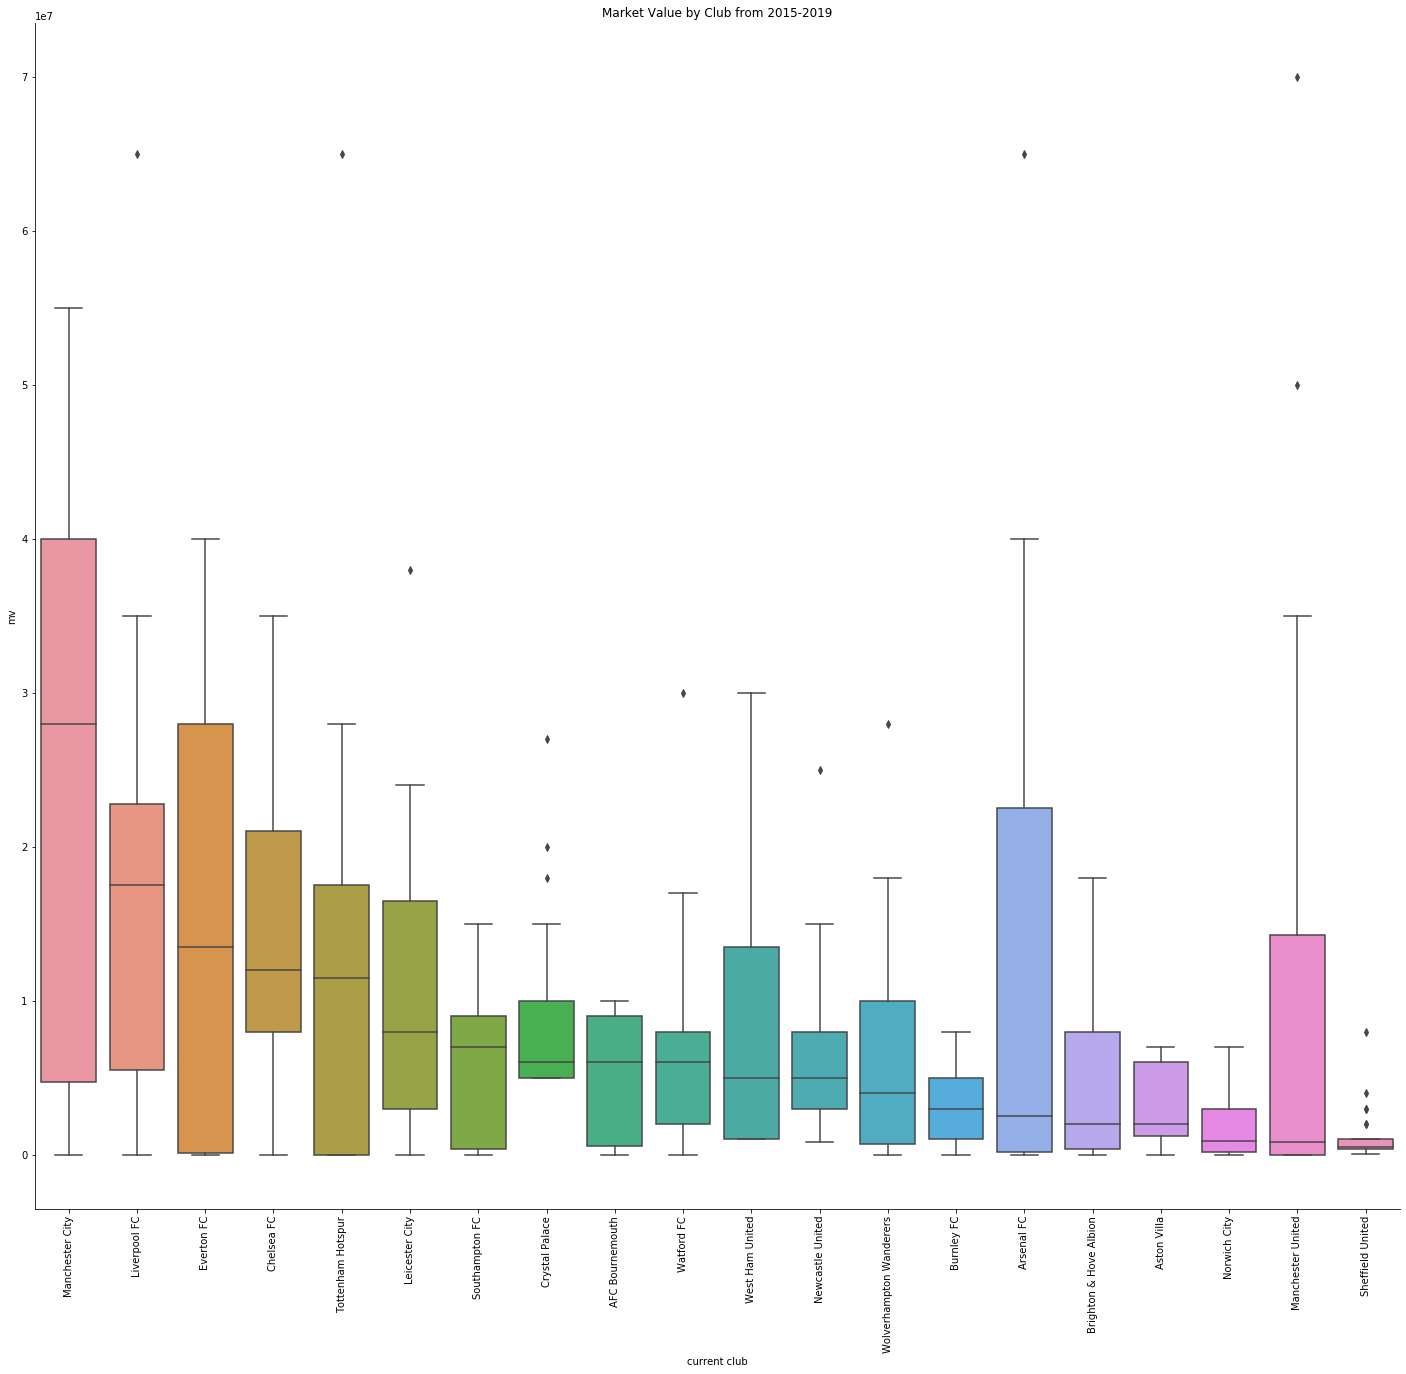

In [48]:
#Historical trends from 
ax=sns.catplot(x="current club", y="mv", kind="box", order=order_goals, data=df_merged_all1)
ax.fig.set_size_inches(25,20)
ax.set_xticklabels(rotation=90)
plt.title('Market Value by Club from 2015-2019')
plt.show()